In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
movies = pd.read_csv(r"C:\Users\Aishu\Desktop\MS Information Systems\Aishwarya\Data Analysis\movies.csv")
ratings = pd.read_csv(r"C:\Users\Aishu\Desktop\MS Information Systems\Aishwarya\Data Analysis\ratings.csv")
movie_data = pd.merge(ratings, movies, on = 'movieId')
movie_data.groupby('title')['rating'].mean().sort_values(ascending=False).head()
movie_data.groupby('title')['rating'].count().sort_values(ascending=False).head()
ratings_mean_count = pd.DataFrame(movie_data.groupby('title')['rating'].mean())
ratings_mean_count['rating_counts']=pd.DataFrame(movie_data.groupby('title')['rating'].count())
ratings_mean_count.head()

,rating,rating_counts
title,,
"""Great Performances"" Cats (1998)",2.815556,225
#1 Cheerleader Camp (2010),2.777778,9
#Captured (2017),2.500000,1
#Horror (2015),2.078947,19
#SCREAMERS (2016),2.500000,1


<Figure size 576x432 with 0 Axes>

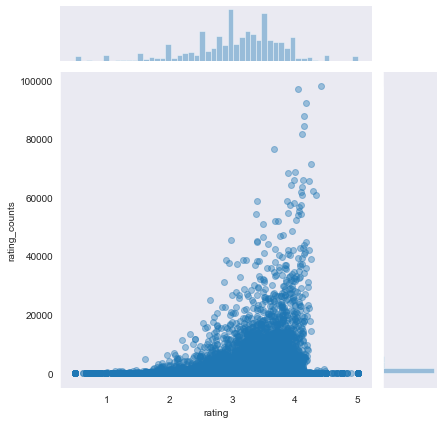

In [20]:
%matplotlib inline
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
# ratings_mean_count['rating_counts'].hist(bins=50)
# ratings_mean_count['rating'].hist(bins=50)
sns.jointplot(x='rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)

In [7]:
user_movie_rating = movie_data.pivot(index='userId', columns='title',values='rating')
#df.groupby('list')['DIAGNOSIS'].apply(list).to_dict()
forrest_gump_ratings = user_movie_rating['Forrest Gump (1994)']
forrest_gump_ratings.head()

ValueError: Unstacked DataFrame is too big, causing int32 overflow

In [6]:
movies_like_forest_gump = user_movie_rating.corrwith(forrest_gump_ratings)

corr_forrest_gump = pd.DataFrame(movies_like_forest_gump, columns['Correlation'])
corr_forrest_gump.dropna(inplace=True)
corr_forrest_gump = corr_forrest_gump.join(ratings_mean_count['rating_counts'])
corr_forrest_gump[corr_forrest_gump ['rating_counts']>50].sort_values('Correlation', ascending=False).head()
corr_forrest_gump.head()

NameError: name 'user_movie_rating' is not defined